### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the file and converting it into DataFrame

In [2]:
file=pd.read_csv('songs_normalize.csv')

### Getting information about DataFrame

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [4]:
file.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

<p>The dataset consists of <b>18 columns and 2000 rows</b>. All columns are fully valid i.e. the do not contain any null values. It cotains the information about albums such as their artist,song,genre,tempo etc. For analysis we have 1 boolean , 9 float and 5 integer columns and rest are objects.

### Getting first five columns

In [5]:
file.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Getting last five columns

In [6]:
file.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


### Label Encoding for column "explicit"

In [7]:
exe=LabelEncoder()
file['explicit']=exe.fit_transform(file['explicit'])

In [8]:
df=file.sort_values(by='year')
df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
44,Missy Elliott,Hot Boyz,215466,1,1998,49,0.727,0.445,1,-11.241,1,0.2910,0.33900,0.000000,0.1800,0.5270,81.125,"hip hop, pop, R&B"
53,Sisqo,Incomplete,274226,1,1999,60,0.746,0.443,1,-7.693,0,0.0771,0.28200,0.000000,0.1400,0.2720,119.311,"hip hop, pop, R&B"
57,Donell Jones,"U Know What's Up (feat. Lisa ""Left Eye"" Lopes)",243733,1,1999,63,0.854,0.543,8,-6.166,0,0.0844,0.04020,0.000057,0.0419,0.8680,103.032,"pop, R&B"
55,Mariah Carey,Thank God I Found You (feat. Joe & 98°),257360,0,1999,59,0.348,0.532,10,-5.882,1,0.0331,0.59200,0.000000,0.1060,0.1480,129.297,"pop, R&B"
64,Christina Aguilera,I Turn to You,273706,0,1999,61,0.599,0.470,1,-8.356,1,0.0376,0.38000,0.000000,0.1110,0.2980,127.177,pop
66,Red Hot Chili Peppers,Otherside,255373,0,1999,78,0.458,0.795,0,-3.265,1,0.0574,0.00316,0.000202,0.0756,0.5130,123.229,rock
24,Melanie C,I Turn To You,352173,0,1999,54,0.522,0.803,1,-5.825,1,0.0327,0.00117,0.001670,0.3100,0.0783,135.205,"pop, Dance/Electronic"
19,Dr. Dre,The Next Episode,161506,1,1999,82,0.922,0.909,10,-2.429,0,0.2700,0.02810,0.000000,0.0856,0.3090,95.295,hip hop
30,DMX,Party Up,268866,1,1999,71,0.510,0.931,11,-3.302,1,0.3470,0.07380,0.000000,0.5000,0.5300,201.936,"hip hop, pop"
69,Santana,Maria Maria (feat. The Product G&B),261973,0,1999,66,0.777,0.601,2,-5.931,1,0.1260,0.04060,0.002010,0.0348,0.6800,97.911,"rock, blues, latin"


In [9]:
df.tail(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1986,Lauv,i'm so tired...,162582,0,2019,2,0.599,0.733,11,-7.058,1,0.2030,0.17600,0.000000,0.2420,0.534,102.211,"pop, Dance/Electronic"
1972,Jonas Brothers,Only Human,183000,0,2019,71,0.795,0.496,0,-5.883,1,0.0722,0.10800,0.000000,0.0645,0.874,94.010,pop
1971,Wiley,Boasty (feat. Idris Elba),177185,1,2019,64,0.887,0.765,2,-5.207,1,0.0669,0.00915,0.000872,0.0907,0.456,102.958,"hip hop, Dance/Electronic"
1980,Anuel AA,Secreto,258800,0,2019,75,0.807,0.803,11,-4.156,1,0.1260,0.60200,0.008530,0.1360,0.706,91.987,latin
1999,Post Malone,Circles,215280,0,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop
1969,Billie Eilish,bury a friend,193143,0,2019,75,0.905,0.389,8,-14.505,1,0.3320,0.74000,0.162000,0.1060,0.196,120.046,"pop, Dance/Electronic"
1968,AJ Tracey,Ladbroke Grove,190537,0,2019,69,0.903,0.839,11,-9.447,0,0.2080,0.09390,0.000000,0.1020,0.727,133.986,"hip hop, Dance/Electronic"
308,t.A.T.u.,All The Things She Said,214440,1,2020,39,0.527,0.834,5,-5.767,0,0.0474,0.04110,0.005990,0.1050,0.381,179.920,pop
568,Will Smith,Switch,197666,0,2020,34,0.873,0.900,5,-4.325,0,0.1800,0.01070,0.000502,0.5560,0.478,102.516,"hip hop, pop"
1991,NSG,Options,240081,1,2020,57,0.836,0.621,1,-4.684,0,0.0894,0.38900,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop"


### Visualization

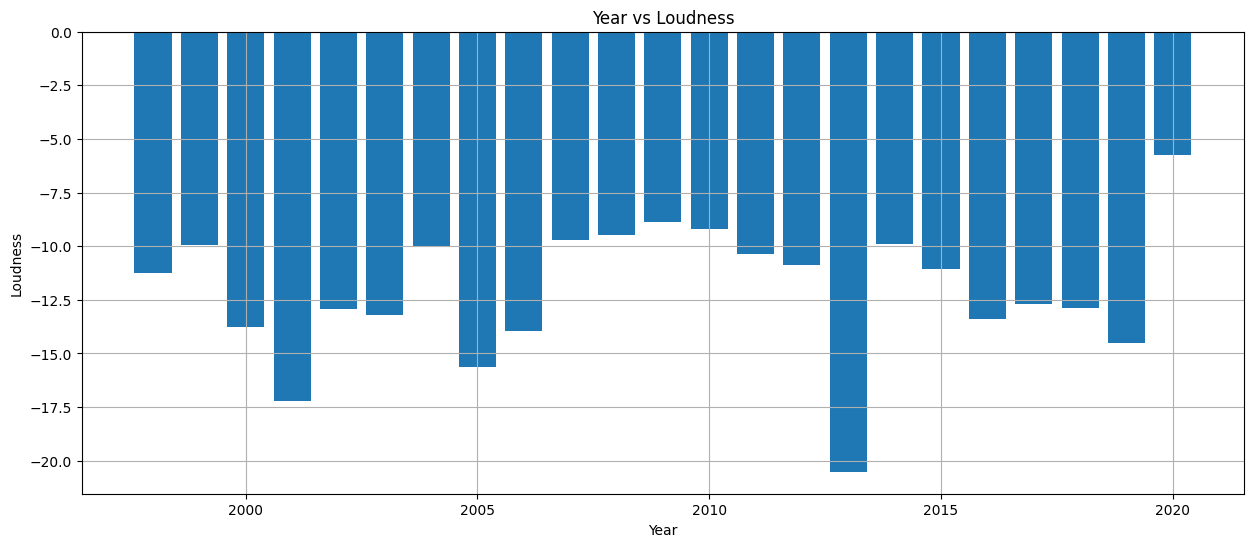

In [20]:
plt.figure(figsize=(15,6))
plt.bar(df['year'],df['loudness'])
plt.title('Year vs Loudness')
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.grid(True)
plt.show()

<p>From above bar graph it can be seen that there is a significant increase in the <b>'loudness'</b> of songs in the year <b>2013</b></p>

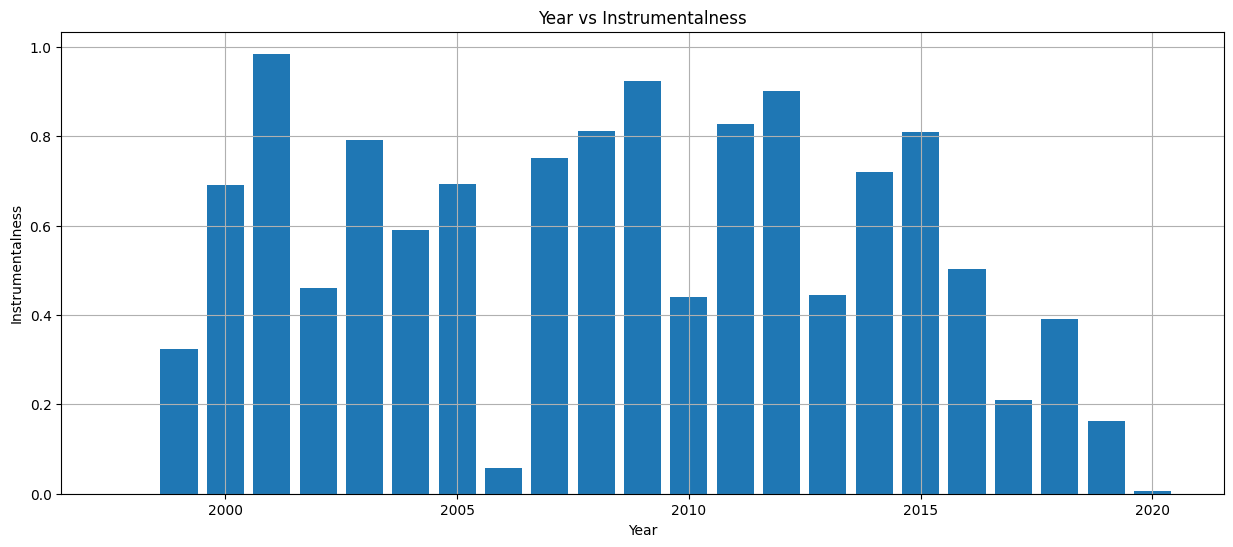

In [25]:
plt.figure(figsize=(15,6))
plt.bar(df['year'],df['instrumentalness'],data=df)
plt.title('Year vs Instrumentalness')
plt.xlabel('Year')
plt.ylabel('Instrumentalness')
plt.grid(True)
plt.show()

<p> There is decrease in instrumentalness after the year <b>2015</b>. Instrumentalness drastically decreased in year <b>2006</b>. The year <b>2001</b> and <b>2020</b> shows maximum and mininmum instrumentalness respectively.

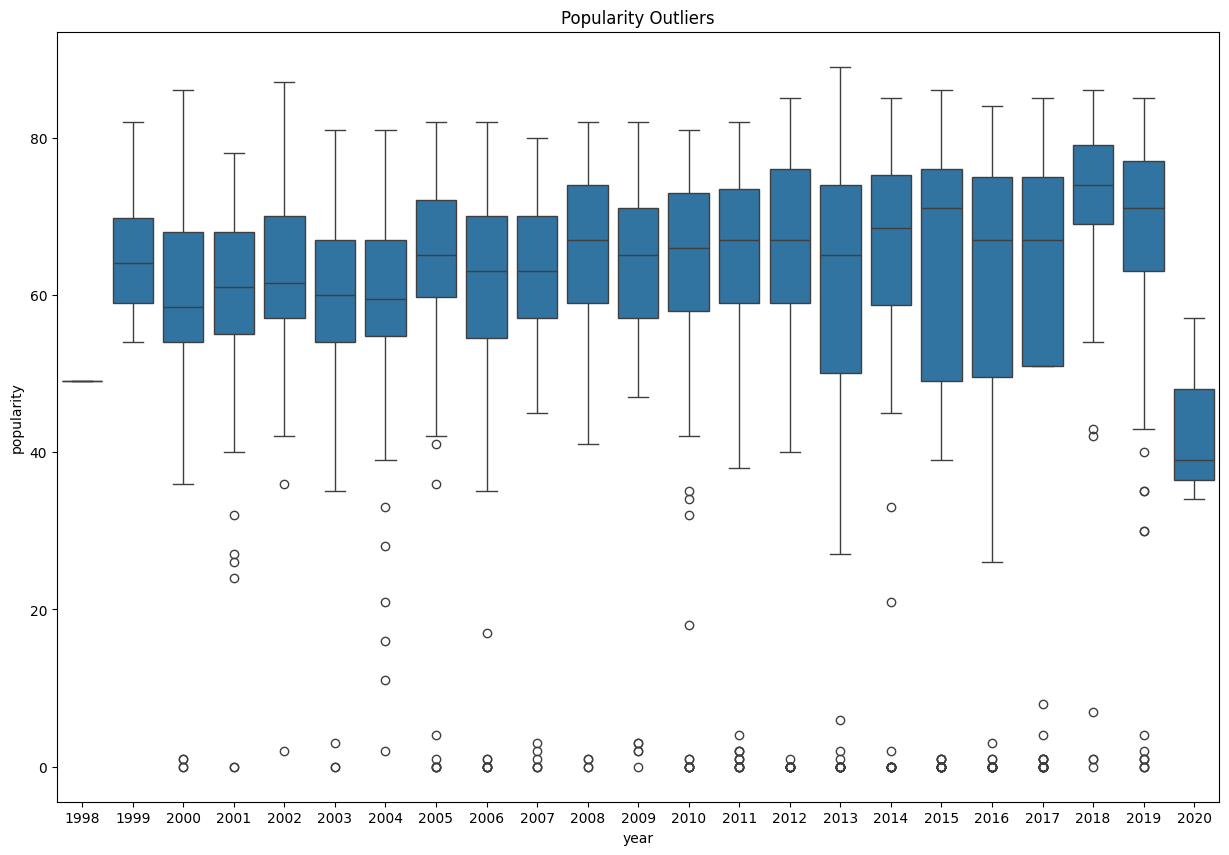

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='year',y='popularity',data=df)
plt.title('Popularity Outliers')
plt.show()

#### Top 10 values by Genre

In [24]:
top_genre=df['genre'].value_counts().nlargest(10)
print(top_genre)

genre
pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
rock                               58
rock, pop                          43
Dance/Electronic                   41
Name: count, dtype: int64


<p>
<h3>Correlation Matrix</h3>
1) It will be created to find relation
</p>

<class 'pandas.core.frame.DataFrame'>


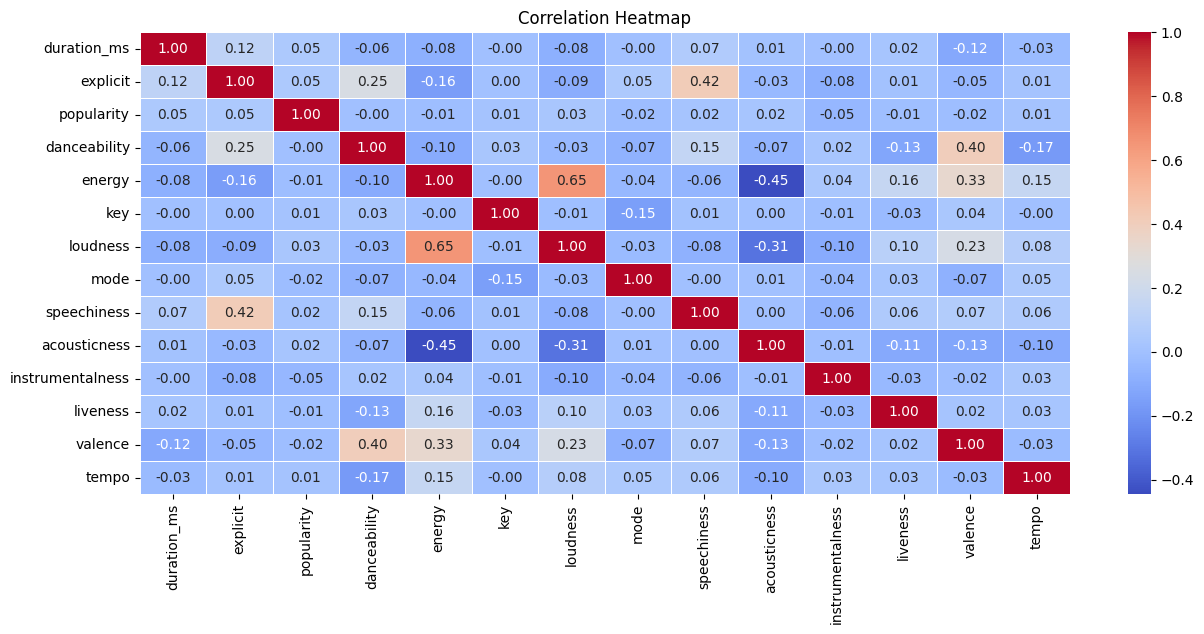

In [34]:
num_col=df.select_dtypes(include=['int64','float64']).drop(columns=['year'])
print(type(num_col))
cor_mat=num_col.corr()
plt.figure(figsize=(15,6))
plt.title('Correlation Heatmap')
sns.heatmap(cor_mat,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.show()